# Data Wrangling - Week 2 Task 
The aim of this task is to prepare an online retail dataset for further analysis. This involves loading, cleaning and validating the data. 

#### Dataset
The dataset used here is a transactional dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts and have may wholesale customers. <br>
Download the dataset here - [Online Retail](http://archive.ics.uci.edu/dataset/352/online+retail), and unzip it. 

#### Variable Table
![Variable Table](variable_table.png)


#### Libraries used
- pandas
- matplotlib
- re



Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

**Data Loading**

In [2]:
file = './Online Retail.xlsx'
df = pd.read_excel(file, index_col=None)

Data inspection

In [3]:
#Check first five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#to see how many non-null values there are and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#to get the basic statistics from the numerical columns
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


There are 541909 rows in the data and 8 columns. 

#### Handling missing values 

Description and CustomerID have null values. We'd be inspecting this further to gain more insights about rows with null values by checking the percentage of null values and the characteristics of the columns and rows with null values.

In [6]:
missing_percentage = df['CustomerID'].isna().mean() * 100
print(missing_percentage)

null_customerid = df[df['CustomerID'].isnull()]
null_customerid.describe()

24.926694334288598


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,135080.000000,135080,135080.000000,0.0
mean,1.995573,2011-06-16 03:03:12.611637760,8.076577,NaN
min,-9600.000000,2010-12-01 11:52:00,-11062.060000,NaN
25%,1.000000,2011-02-21 18:10:00,1.630000,NaN
50%,1.000000,2011-06-27 15:27:00,3.290000,NaN
75%,3.000000,2011-10-11 16:37:00,5.450000,NaN
max,5568.000000,2011-12-09 10:26:00,17836.460000,NaN
std,66.696153,NaN,151.900816,NaN


In [7]:
missing_percentage = df['Description'].isna().mean() * 100
print(missing_percentage)

null_description = df[df['Description'].isnull()]
null_description.describe()

0.2683107311375157


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,1454.000000,1454,1454.0,0.0
mean,-9.359697,2011-05-22 18:40:24.883080960,0.0,NaN
min,-3667.000000,2010-12-01 11:52:00,0.0,NaN
25%,-24.000000,2011-03-22 17:04:15,0.0,NaN
50%,-3.000000,2011-05-03 13:35:30,0.0,NaN
75%,4.000000,2011-08-04 15:42:45,0.0,NaN
max,5568.000000,2011-12-08 14:06:00,0.0,NaN
std,243.238758,NaN,0.0,NaN


On further inspection:

- The `CustomerID` has almost 25% null values - 135080 null values. This size makes it an important segment of the dataset  And it is a feature that not an ID and can be replaced with str `00000` to maintain data integrity. `00000` is used because the customerid is a 5 digit integral number.

- `Description` has about 0.27% null values. Where `Description` is null, `CustomerID` is also null and UnitPrice is 0.0. As such, these rows would be dropped.


In [8]:
df = df.dropna(subset=['Description'])
df['CustomerID'] = df['CustomerID'].fillna('00000')

#df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  object        
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.1+ MB


#### Handling inconsistent formatting

- `InvoiceNo` is should be 6 digits except for cancelled transations where it starts with a `C` followed by 6 digits
-  `Stockcode` should consist of 5 digits
- `Description` is a string that must not contain only digits
- `Quantity` should be an integer
- `InvoiceDate` should be in the pattern `YYYY-MM-DD HH:mm:ss`
- `UnitPrice` should be in 2 decimal places
- `CustomerID` should be a 5-digit integer
- `Country` should consist of alphabets with whitespaces in between

Using regex, we'd define patterns to fit the expected format, them check for inconsistency using these patterns

In [9]:
# Define the patterns
invoice_no_pattern = r'^(C)?\d{6}$'
stock_code_pattern = r'^\d{5}$'
description_pattern = r'^(?!\d+$).+$'
quantity_pattern = r'^\d+$'
date_pattern = r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$'
unit_price_pattern = r'^\d+\.\d{2}$'
customer_id_pattern = r'^\d{5}$'
country_pattern = r'^[a-zA-Z\s]+$'

In [10]:
# Check for inconsistencies in the InvoiceNo column
inconsistent_invoice_no = df[~df['InvoiceNo'].astype(str).str.match(invoice_no_pattern)]
inconsistent_invoice_no

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,00000,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,00000,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,00000,United Kingdom


In [11]:
# Check for inconsistencies in the StockCode column
inconsistent_stock_code = df[~df['StockCode'].astype(str).str.match(stock_code_pattern)]
inconsistent_stock_code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [12]:
# Check for inconsistencies in the Description column
inconsistent_description = df[~df['Description'].astype(str).str.match(description_pattern)]
inconsistent_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
420391,572891,23343,20713,-400,2011-10-26 14:14:00,0.0,00000,United Kingdom


In [13]:
# Check for inconsistencies in the Quantity column
inconsistent_quantity = df[~df['Quantity'].astype(str).str.match(quantity_pattern)]
inconsistent_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [14]:
# Check for inconsistencies in the InvoiceDate column
inconsistent_date = df[~df['InvoiceDate'].astype(str).str.match(date_pattern)]
inconsistent_date

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [15]:
# Check for inconsistencies in the UnitPrice column
inconsistent_unit_price = df[~df['UnitPrice'].astype(str).str.match(unit_price_pattern)]
inconsistent_unit_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.1,13047.0,United Kingdom
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.1,13047.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
59,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.1,17850.0,United Kingdom
76,536375,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:32:00,2.1,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.0,12713.0,Germany
541831,581579,22941,CHRISTMAS LIGHTS 10 REINDEER,4,2011-12-09 12:19:00,8.5,17581.0,United Kingdom
541847,581580,22144,CHRISTMAS CRAFT LITTLE FRIENDS,1,2011-12-09 12:20:00,2.1,12748.0,United Kingdom


In [16]:
# Check for inconsistencies in the CustomerID column
inconsistent_customer_id = df[~df['CustomerID'].astype(str).str.match(customer_id_pattern)]
inconsistent_customer_id

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
# Check for inconsistencies in the Country column
inconsistent_country = df[~df['Country'].astype(str).str.match(country_pattern)]
inconsistent_country

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


To handle inconsistencies noticed
- For InvoiceNo, drop rows not that match the pattern
- For StockCode, extract 5 dgits from the rows and drop the rest that are invalid.
- For Description, drop incosistent row because it's a number and is just a single value.
- UnitPrice would be rounded to 2 decimal places.
- For negative values in Quantity and UnitPrice, handle as outliers.
- For CustomerID, get read of decimal part to get a 5-digit ID.
- Country and invoiceDate need no formatting.

In [18]:
new_df = df.copy()

# Remove rows with inconsistent InvoiceNo
new_df = new_df[new_df['InvoiceNo'].astype(str).str.match(invoice_no_pattern)]

# Remove rows with inconsistent StockCode
new_df['StockCode'] = new_df['StockCode'].astype(str).str.extract('(\d{5})') #extract 5 digit numbers from StockCode
new_df = new_df.dropna(subset=['StockCode'])

# Remove rows with inconsistent Description
new_df = new_df[new_df['Description'].astype(str).str.match(description_pattern)] # remove rows with CustomerID containing only digits
new_df['Description'] = new_df['Description'].astype(str).str.strip().str.lower() # remove leading/trailing whitespaces and standardize to lowercase
new_df['Description'] = new_df['Description'].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # remove special characters

# Convert UnitPrice to 2 decimal places
new_df['UnitPrice'] = new_df['UnitPrice'].round(2) 

# Remove decimal place from CustomerID
new_df['CustomerID'] = new_df['CustomerID'].astype(str).str.split('.').str[0] 

# Convert country names to title case
new_df['Country'] = new_df['Country'].str.title()

# reset index to delete the old index
new_df.reset_index(drop=True, inplace=True) 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537474 entries, 0 to 537473
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    537474 non-null  object        
 1   StockCode    537474 non-null  object        
 2   Description  537474 non-null  object        
 3   Quantity     537474 non-null  int64         
 4   InvoiceDate  537474 non-null  datetime64[ns]
 5   UnitPrice    537474 non-null  float64       
 6   CustomerID   537474 non-null  object        
 7   Country      537474 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 32.8+ MB


In [19]:
#Set original dataframe to new dataframe
df = new_df
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


#### Handling incorrect data types
- `InvoiceNo`, `StockCode` and `CustomerID` to be in string format
- `Quantity` should be an integer
- `InvoiceDate` already in datetime format
- `UnitPrice` should be a float
- `Country` and `Description` to be in String format

In [20]:
# set columns to correct data types

df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Quantity'] = df['Quantity'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['UnitPrice'] = df['UnitPrice'].astype(float)
df['CustomerID'] = df['CustomerID'].astype(str)
df['Country'] = df['Country'].astype(str)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537474 entries, 0 to 537473
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    537474 non-null  object        
 1   StockCode    537474 non-null  object        
 2   Description  537474 non-null  object        
 3   Quantity     537474 non-null  int32         
 4   InvoiceDate  537474 non-null  datetime64[ns]
 5   UnitPrice    537474 non-null  float64       
 6   CustomerID   537474 non-null  object        
 7   Country      537474 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 30.8+ MB


#### Outliers
We'd check numerical columns for outliers - UnitPrice and Quantity. From the `df.describe()` function ran earlier,  the min value for Quantity is -80995.000000 and for UnitPrice, that is -11062.060000. We'd remove 0 and negative values as they are not needed. We'd then use boxplots to visualize the data and identify the other outliers.

In [21]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,527725.000000,527725,527725.000000
mean,10.567997,2011-07-04 21:35:50.715164160,3.265320
min,1.000000,2010-12-01 08:26:00,0.040000
25%,1.000000,2011-03-28 12:23:00,1.250000
50%,3.000000,2011-07-20 13:26:00,2.080000
75%,11.000000,2011-10-19 13:49:00,4.130000
max,80995.000000,2011-12-09 12:50:00,649.500000
std,155.839274,NaN,4.377915


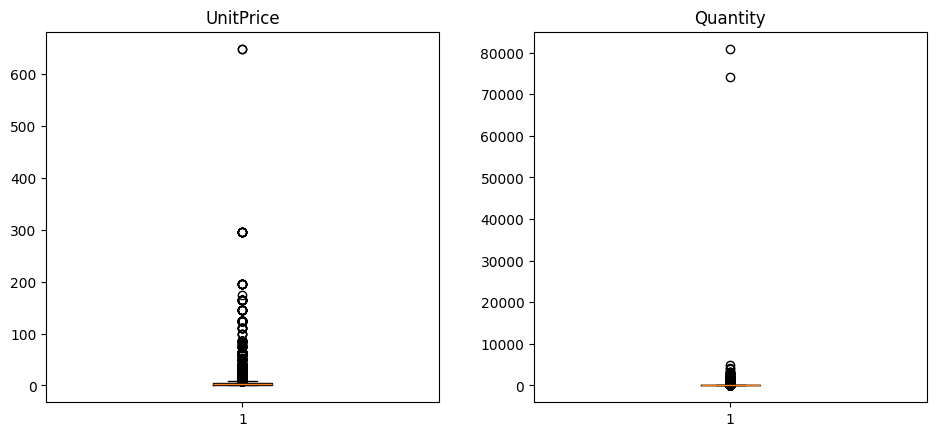

In [22]:
# Create a figure and axis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a box plot for UnitPrice
axes[0].boxplot(df['UnitPrice'])
axes[0].set_title('UnitPrice')

# Create a box plot for Quantity
axes[1].boxplot(df['Quantity'])
axes[1].set_title('Quantity')

# Show the plot
plt.tight_layout(pad=3.0) #for spacing
plt.show()


**Observations from UnitPrice Boxplot**
- Values range from 1 to above 600.
- Median is below 100 (indicating most unit prices are lower than 100).
- A single outlier exists around 600. Another exists around 300 but it is closer to the distribution of prices.

**Observations from Quantity Boxplot**
- Values range from 1 to abive 80,000.
- Median and most values fall below 10,000 (indicating most quantities are within this range).
- Two outliers are present, around 70,000 to 80,000.

To handle these outliers, we'd check to see whether they are valid data points or possible errors.

In [23]:
# inspecting outliers in the 'UnitPrice' column
price_outliers = df[df['UnitPrice'] > 300]
price_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
220459,556444,22502,picnic basket wicker 60 pieces,60,2011-06-10 15:28:00,649.5,15098,United Kingdom
220460,556446,22502,picnic basket wicker 60 pieces,1,2011-06-10 15:33:00,649.5,15098,United Kingdom


In [24]:
# inspecting outliers in the 'Quantity' column
quantity_outliers = df[df['Quantity'] > 10000]
quantity_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61167,541431,23166,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
535994,581483,23843,paper craft little birdie,80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


- On inspection, we find that the outliers in UnitPrice (>300) to be two entries of the same product that cost `649.50`.
- We also find that the outliers in Quantity are two entries with quantities above 70000. It was stated in the introductory part of this notebook that the business has many wholesalers.So that would explain the large quantity.
<br>
As such, we'd leave each outlier as it is.

Data Validation

In [25]:
# validate the data

#check that dates are between 01/12/2010 and 09/12/2011
start_date = pd.to_datetime('2010-12-01 00:00:00')
end_date = pd.to_datetime('2011-12-09 23:59:59')

# check for dates outside the range
outliers = df[(df['InvoiceDate'] < start_date) | (df['InvoiceDate'] > end_date)]
outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [26]:
#check for missing values   
missing_values = df.isnull().sum()
missing_values

#check for negative values in 'UnitPrice' and 'Quantity'
negative_values = df[(df['UnitPrice'] <= 0) | (df['Quantity'] <= 0)]
negative_values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Bonus: Handling duplicates**

In [27]:
# check for duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
514,536409,21866,union jack flag luggage tag,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
524,536409,22866,hand warmer scotty dog design,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
534,536409,22900,set 2 tea towels i love london,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
536,536409,22111,scottie dog hot water bottle,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
552,536412,22327,round snack boxes set of 4 skulls,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
537243,581538,22068,black pirate treasure chest,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
537257,581538,23318,box of 6 mini vintage crackers,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
537260,581538,22992,revolver wooden ruler,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
537267,581538,22694,wicker star,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


In [28]:
# drop duplicate rows
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)


**Bonus: Adding new feature**

- TotalAmount  - cost of transaction: UnitPrice * Quantity

In [29]:
#Adding Total Amount Column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Conclusion and Saving cleaned data

In [30]:
#Ispecting the data again to check that it's clean and ready for further analysis
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522426 entries, 0 to 522425
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    522426 non-null  object        
 1   StockCode    522426 non-null  object        
 2   Description  522426 non-null  object        
 3   Quantity     522426 non-null  int32         
 4   InvoiceDate  522426 non-null  datetime64[ns]
 5   UnitPrice    522426 non-null  float64       
 6   CustomerID   522426 non-null  object        
 7   Country      522426 non-null  object        
 8   TotalAmount  522426 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 33.9+ MB


In [31]:
# Save the cleaned data to a new csv file
df.to_csv('cleaned_data.csv', index=False)
print('Data saved successfully!')

Data saved successfully!


Final data has 522426 rows and 9 columns.